In [2]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
len(words)

32033

In [3]:
min(len(w) for w in words)
max(len(w) for w in words)

15

In [3]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [30]:
sorted(b.items(), key=lambda x: x[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [4]:
import torch

In [5]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [6]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [7]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 26.5, 26.5, -0.5)

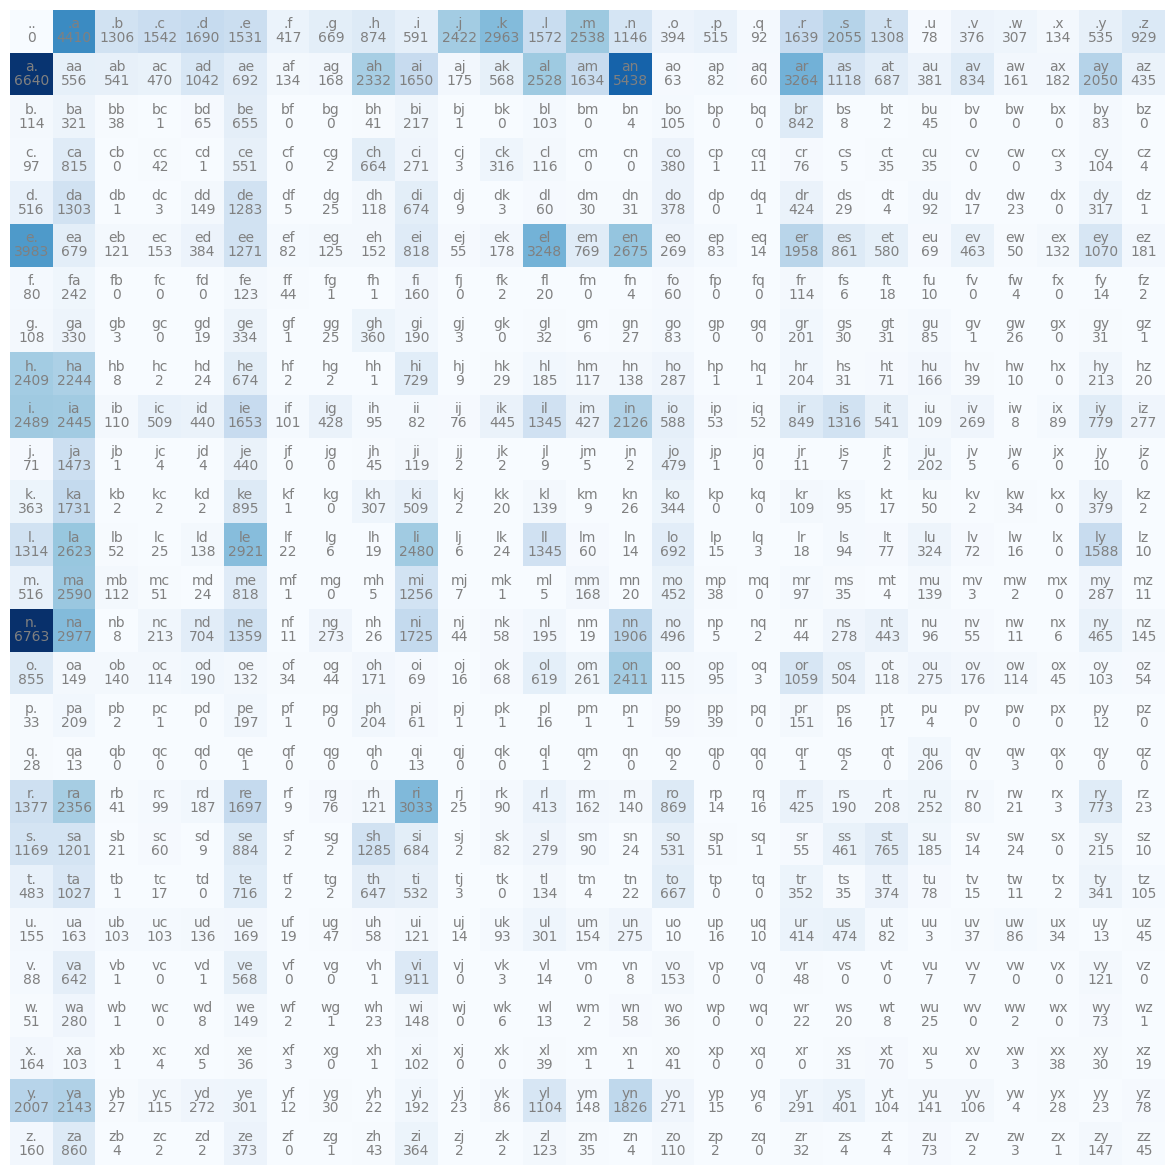

In [9]:
plt.figure(figsize=(15,15))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')

In [10]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [24]:
P = (N+1).float()
P /= P.sum(dim=1, keepdim=True) # Broadcasting trickiness

In [12]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [13]:
for i in range(20):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))


sonde.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


In [ ]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [14]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob).item()
        log_likelihood += logprob
        n+=1
        print(f'{ch1}{ch2}: {logprob:.4f}')

.e: -3.0410
em: -3.2793
mm: -3.6753
ma: -0.9454
a.: -1.6305
.o: -4.3965
ol: -2.5526
li: -1.7293
iv: -4.1845
vi: -1.0476
ia: -1.9807
a.: -1.6305
.a: -1.9835
av: -3.7041
va: -1.3971
a.: -1.6305
.i: -3.9919
is: -2.5998
sa: -1.9119
ab: -4.1363
be: -1.4044
el: -1.8396
ll: -2.3408
la: -1.6733
a.: -1.6305
.s: -2.7468
so: -2.7270
op: -4.4180
ph: -1.6364
hi: -2.3485
ia: -1.9807
a.: -1.6305
.c: -3.0339
ch: -1.6774
ha: -1.2251
ar: -2.3405
rl: -3.4256
lo: -3.0047
ot: -4.2032
tt: -2.7031
te: -2.0549
e.: -1.6357
.m: -2.5358
mi: -1.6687
ia: -1.9807
a.: -1.6305
.a: -1.9835
am: -3.0321
me: -2.0971
el: -1.8396
li: -1.7293
ia: -1.9807
a.: -1.6305
.h: -3.6011
ha: -1.2251
ar: -2.3405
rp: -6.7434
pe: -1.6711
er: -2.3455
r.: -2.2231
.e: -3.0410
ev: -3.7859
ve: -1.5194
el: -1.8396
ly: -2.1749
yn: -1.6800
n.: -0.9982
.a: -1.9835
ab: -4.1363
bi: -2.5061
ig: -3.7214
ga: -1.7755
ai: -3.0224
il: -2.5780
l.: -2.3641
.e: -3.0410
em: -3.2793
mi: -1.6687
il: -2.5780
ly: -2.1749
y.: -1.5855
.e: -3.0410
el: -1.8396
li: 

In [15]:
print(f'normalized negative log likelihood: {-log_likelihood / n:.4f}')

normalized negative log likelihood: 2.4546


In [1]:
# NEURAL NETWORK

In [15]:
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [16]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc.shape

torch.Size([228146, 27])

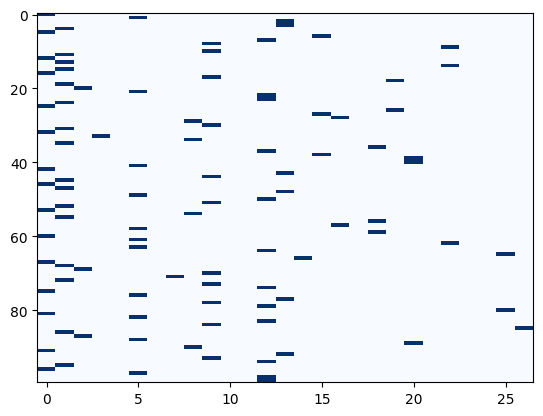

In [20]:
plt.imshow(xenc[:100], cmap='Blues', aspect='auto')

In [29]:
# Initialization and forward pass
W = torch.randn((27, 27))
logits = xenc @ W # num_xs x 27
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(len(xs)), ys].log().mean()

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [5], [228146]

In [28]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0359, 0.0080, 0.0478, 0.1013, 0.0150, 0.0052, 0.0550, 0.0039, 0.0358,
        0.0216, 0.0274, 0.0747, 0.0051, 0.0082, 0.1359, 0.0186, 0.0147, 0.0645,
        0.0032, 0.0911, 0.0432, 0.0094, 0.0668, 0.0227, 0.0120, 0.0478, 0.0252])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.005160348489880562
log likelihood: -5.266751289367676
negative log likelihood: 5.266751289367676
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0316, 0.0326, 0.0088, 0.0047, 0.0196, 0.0153, 0.0162, 0.0080, 0.0089,
        0.0634, 0.0335, 0.0427, 0.0066, 0.0285, 0.0439, 0.0546, 0.0153, 0.0107,
        0.0117, 0.1364, 0.0309, 0.1060, 0.0229, 0.0422, 0.0358, 0.0074, 0.1617])
label (actual next character): 13
probability assigned by the net to the the correct character: 0